<a href="https://colab.research.google.com/github/Prathi7/Machine-Learning-Concepts/blob/main/ML_Logistic_Regression%2C_Gradient_Descent_%26_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import random
import time


eta = 0.01
iterations = 1000
FIGSIZE = (12,8)
np.random.seed(0)

In [29]:
# Generate Data
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def GenLabel(xi, w_star):
    probability = sigmoid(np.dot(w_star, xi))
    return 1 if np.random.uniform(0, 1) <= probability else 0

def generate_data(m):
    # returns the true w as well as X, Y data
    w = np.random.normal(0,1,10)
    w_star = w/np.linalg.norm(w)

    x_train = np.random.normal(0, 1, size=(m, 10))
    y_train = [GenLabel(xi, w_star) for xi in x_train]

    return(w_star,x_train,y_train)


In [30]:
#Logistic Regression
def log_reg(X, Y):
    return LogisticRegression(max_iter=1000).fit(X, Y).coef_

def logistic_regression(x,y,iterations):
    start_time = time.time()
    logistic_reg = LogisticRegression(max_iter = iterations).fit(x, y)
    end_time = time.time()
    exec_time = end_time - start_time

    return(logistic_reg.coef_[0],exec_time)

def gradient(w, xi, yi):
    yhat = 1.0 / (1.0 + np.exp(-w.dot(xi)))
    return (yhat - yi) * yhat * (1 - yhat) * xi

#Gradient Descent
def gd(X, Y, n_iter=1000, eta=0.01):
    w = np.zeros(X.shape[1])
    for t in range(n_iter):
        grad = np.mean([gradient(w, x, y) for x, y in zip(X, Y)], axis=0)
        w = w - eta * grad
    return w


def gradient_descent(x,y,iterations):
    start_time = time.time()

    # Initialize the weight vector w_init with zeros
    w = np.zeros(10)

    # Gradient descent training
    for _ in range(iterations):

        gradient = np.zeros(10)
        for i in range(x.shape[0]):
            xi=x[i]
            yi=y[i]

            z = np.dot(xi,w)
            gradient += (sigmoid(z) - y[i]) * sigmoid(z) * (1 - sigmoid(z)) * xi
            gradient /= x.shape[0]

        # Update the weight vector w_init using gradient descent
            w = w - eta * gradient
    end_time = time.time()
    exec_time = end_time - start_time
    return(w,exec_time)

#Stochastic Gradient Descent
def sgd(X, Y, n_iter=1000, eta=0.01):
    w = np.zeros(X.shape[1])
    for t in range(n_iter):
        i = np.random.randint(X.shape[0])
        w = w - eta * gradient(w, X[i], Y[i])
    return w

def stochastic_gradient_descent(x,y,iterations):
    start_time = time.time()
    # Initialize the weight vector w_init with zeros
    w = np.zeros(10)

    for _ in range(iterations):

        i = np.random.randint(0, x.shape[0])
        xi = x[i]
        yi = y[i]
        z = np.dot(xi,w)
        gradient = (sigmoid(z) - yi) * sigmoid(z) * (1 - sigmoid(z)) * xi

        w -= eta * gradient  # Update rule


    end_time = time.time()
    exec_time = end_time - start_time
    return(w,exec_time)




CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


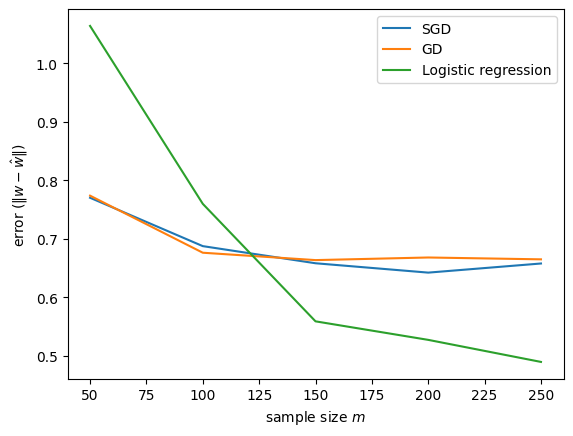

In [31]:
ms = [50, 100, 150, 200, 250]
#%time measures execution time of the next line. %%time measures execution time of the whole cell.
def run_trials(model, num_trials=10):
    errs = []
    for m in ms:
        trial_errs = []
        for _ in range(num_trials):
            w, X, Y = generate_data(m)
            w_hat = model(X, Y)
            trial_errs.append(np.linalg.norm(w - w_hat))
        errs.append(np.mean(trial_errs))
    return errs
%time
gd_errs = run_trials(gd)
%time
logreg_errs = run_trials(log_reg)
%time
sgd_errs = run_trials(sgd)

plt.plot(ms, sgd_errs, label='SGD')
plt.plot(ms, gd_errs, label='GD')
plt.plot(ms, logreg_errs, label='Logistic regression')
plt.xlabel('sample size $m$')
plt.ylabel('error ($\|w - \hat{w}\|$)')
plt.legend()
plt.show()